In [1]:
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Downloading the Dataset
- Link to the Dataset: https://www.kaggle.com/competitions/ieee-fraud-detection/data
- Go to the Kaggle Account and Download the Access Token JSON file.
- Copy the JSON file to "C:\Users\<USER>\.kaggle" folder
- Run the below code and it will download the zip to the parent folder of the notebook.

In [ ]:
!kaggle competitions download -c ieee-fraud-detection

In [ ]:
with zipfile.ZipFile("ieee-fraud-detection.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [2]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
train_id = pd.read_csv('train_identity.csv')
train_trn = pd.read_csv('train_transaction.csv')
test_id = pd.read_csv('test_identity.csv')
test_trn = pd.read_csv('test_transaction.csv')

In [4]:
train_id = reduce_mem_usage(train_id)
train_trn = reduce_mem_usage(train_trn)
test_id = reduce_mem_usage(test_id)
test_trn = reduce_mem_usage(test_trn)

Memory usage of dataframe is 45.12 MB --> 25.86 MB (Decreased by 42.7%)
Memory usage of dataframe is 1775.15 MB --> 542.35 MB (Decreased by 69.4%)
Memory usage of dataframe is 44.39 MB --> 25.44 MB (Decreased by 42.7%)
Memory usage of dataframe is 1519.24 MB --> 472.59 MB (Decreased by 68.9%)


In [5]:
print(train_id.shape, test_id.shape)
print(train_trn.shape, test_trn.shape)

(144233, 41) (141907, 41)
(590540, 394) (506691, 393)


# Data Analysis

Figuring out the target variable in a large Dataset

In [6]:
[c for c in train_trn.columns if c not in test_trn.columns]
# train_id and test_id have same columns

['isFraud']

<AxesSubplot:>

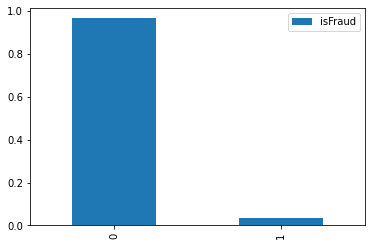

In [7]:
train_trn.isFraud.value_counts(normalize=True).to_frame().plot.bar()

In [ ]:
train_trn['_seq_day'] = train_trn['TransactionDT'] //